In [1]:
#####kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############ loading train and test datasets ##############
df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

##### Filling NAN values ##################
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
train_data['Alley'] = train_data['Alley'].fillna('NA')
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['Fence'] = train_data['Fence'].fillna('NA')
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('NA')
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mode()[0],inplace = True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0],inplace = True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0],inplace = True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0],inplace = True)
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace = True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0],inplace = True)

train_data['YrSold_build'] = 2021 - train_data['YrSold']
train_data.drop(['YrSold'],axis=1,inplace = True)
train_data['YearBuilt_build'] = 2021 - train_data['YearBuilt']
train_data.drop(['YearBuilt'],axis=1,inplace = True)
train_data['YearRemodAdd_build'] = 2021 - train_data['YearRemodAdd']
train_data.drop(['YearRemodAdd'],axis=1,inplace = True)

train_data  = pd.get_dummies(train_data,drop_first=True)

########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.85)

############ Dropping highly corelated columns ########################
train_data = train_data.drop(['BsmtFinType1_NA',
 'BsmtFinType2_NA',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_NA',
 'GarageArea',
 'GarageCond_NA',
 'GarageFinish_NA',
 'GarageQual_NA',
 'MiscFeature_Shed',
 'Neighborhood_Somerst',
 'PoolQC_NA',
 'RoofStyle_Hip',
 'SaleCondition_Partial'],axis=1)

In [3]:
train_data.shape

(1460, 239)

In [4]:
X = train_data.drop(['Id','SalePrice'],axis=1)
y = train_data['SalePrice']

In [19]:
################ PCA on entire dataset ##################
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca1.fit(X)
x_pca_transformed = pca1.transform(X)

In [20]:
####### Model building #############
X = x_pca_transformed
y = train_data['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
############# Model Training ##############
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)

print("test data Score:", rf.score(X_test,y_test))
print("train data Score:" , rf.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))

test data Score: 0.6482305155381114
train data Score: 0.9450114040052099
r2 sqyuare value 0.6482305155381114
MAE: 32607.465243531205
MSE: 2388160019.2037544
RMSE: 48868.80415156232


Text(0, 0.5, 'Second Principal Component')

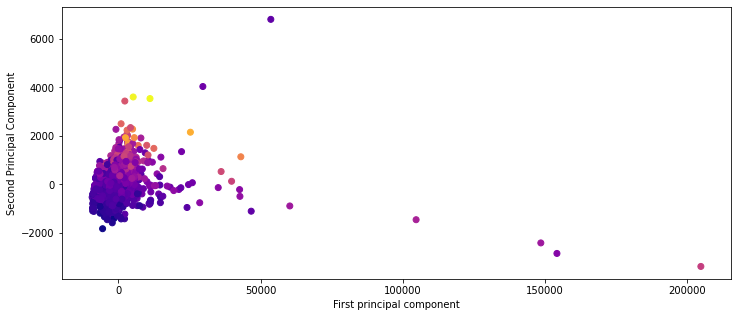

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(x_pca_transformed[:,0],x_pca_transformed[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [18]:
##NOTE: test data accuracy is very less --- 0.6482305155381114 using PCA and RandomForestRegressor

In [27]:
################ PCA on entire dataset ##################
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca1.fit(X)
x_pca_transformed = pca1.transform(X)

####### Model building #############
X = x_pca_transformed
y = train_data['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_y_pred = gbr.predict(X_test)

print("test data Score:", gbr.score(X_test,y_test))
print("train data Score:" , gbr.score(X_train,y_train))

from sklearn.metrics import r2_score
re = r2_score(y_test, gbr_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_y_pred)))

test data Score: 0.7001196766361563
train data Score: 0.8279369075900627
r2 sqyuare value 0.7001196766361563
MAE: 30371.261236791102
MSE: 2035884948.630374
RMSE: 45120.78178212755


In [24]:
##NOTE: test data accuracy is very less ---0.7001196766361563 using PCA and GradientBoostingRegressor

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

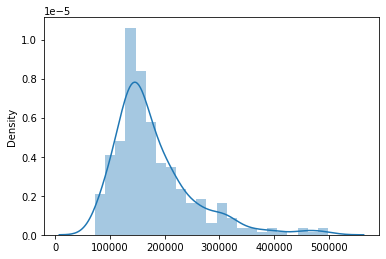

In [26]:
sns.distplot(gbr_y_pred)